In [2]:
# %matplotlib inline%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

df = pd.read_csv("./datasets/fixed_battery_log.csv")
df = df.drop(df.columns[0],axis=1)
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()
df["weekday"] = df["date"].dt.dayofweek
df["time_to_num"]=df["date"].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

In [3]:
def Frequency_Distribution(data, bins, class_width=None):
    data = np.asarray(data)

#     bins = np.arange(0, 110, 10)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))

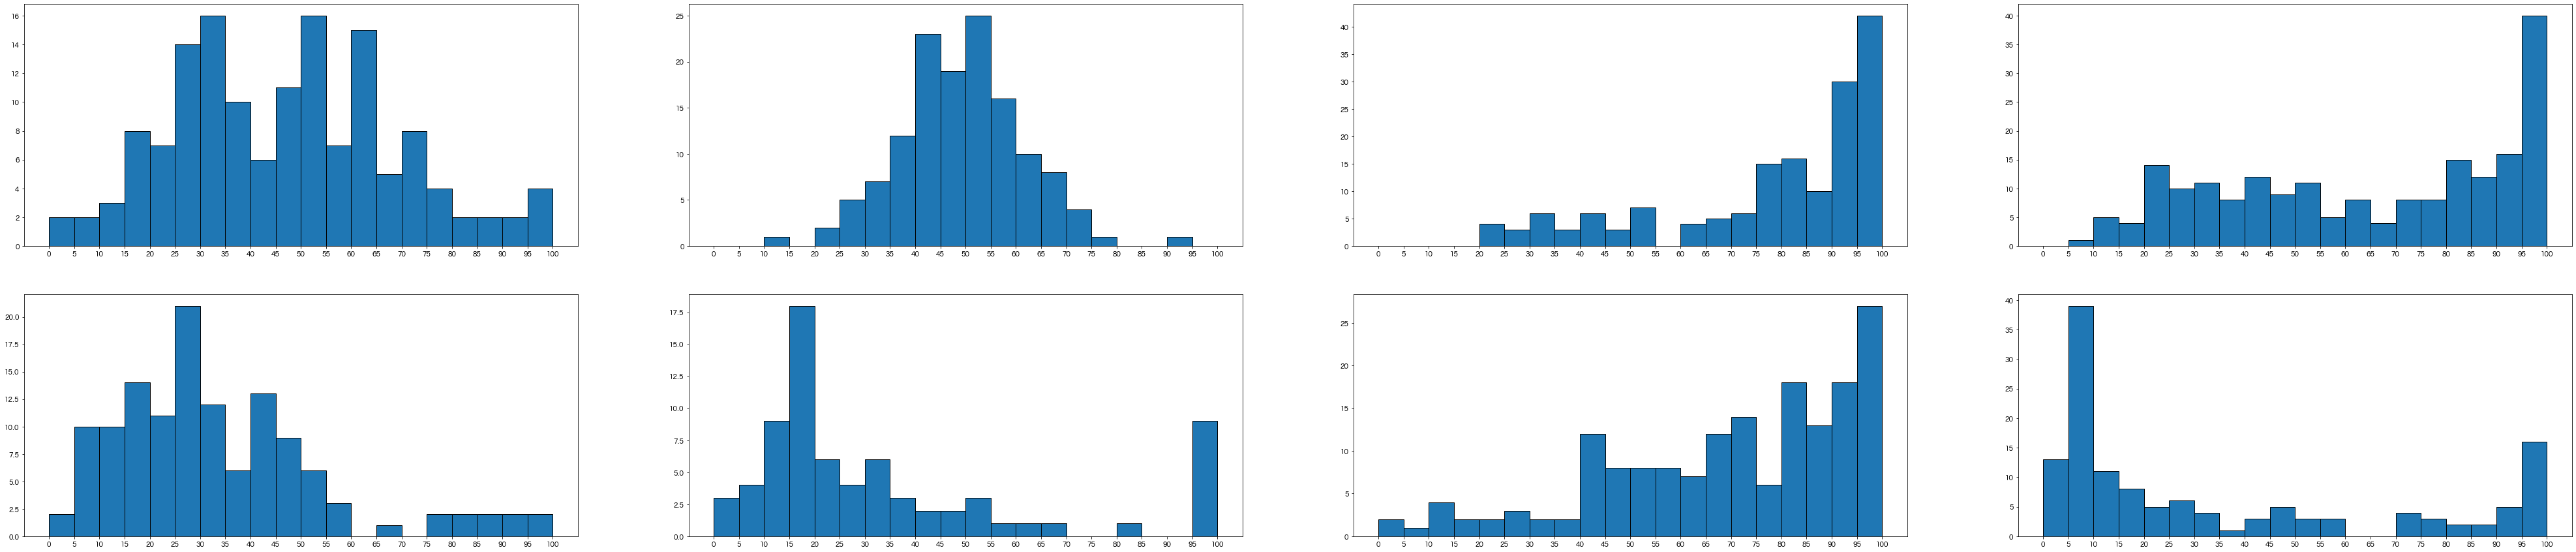

In [9]:
# hist plot - simple
plt.figure(figsize=(70,15))
fuse_users = [x for x in range(0,8)] 
x_range = np.arange(0,105,5)

for i in range(len(users)):
    plt.subplot(2,4,i+1)
    plt.xticks(x_range)
    plt.hist(df.loc[(df["User"] == users[i]) & 
                    (df["state"] == "ON") & 
                    (df["date"] > dt.datetime(2021,12,1)) & 
                    (df["date"] < dt.datetime(2022,1,31))]["battery"],
             range=(0,100),
             bins=20,
             ec="black"
            )
#     user_data.plot.bar(x="階級値",y="度数",width=1,ec="k")
    plt.savefig("bs_2_results/hist_plot_simple_battery.jpg")

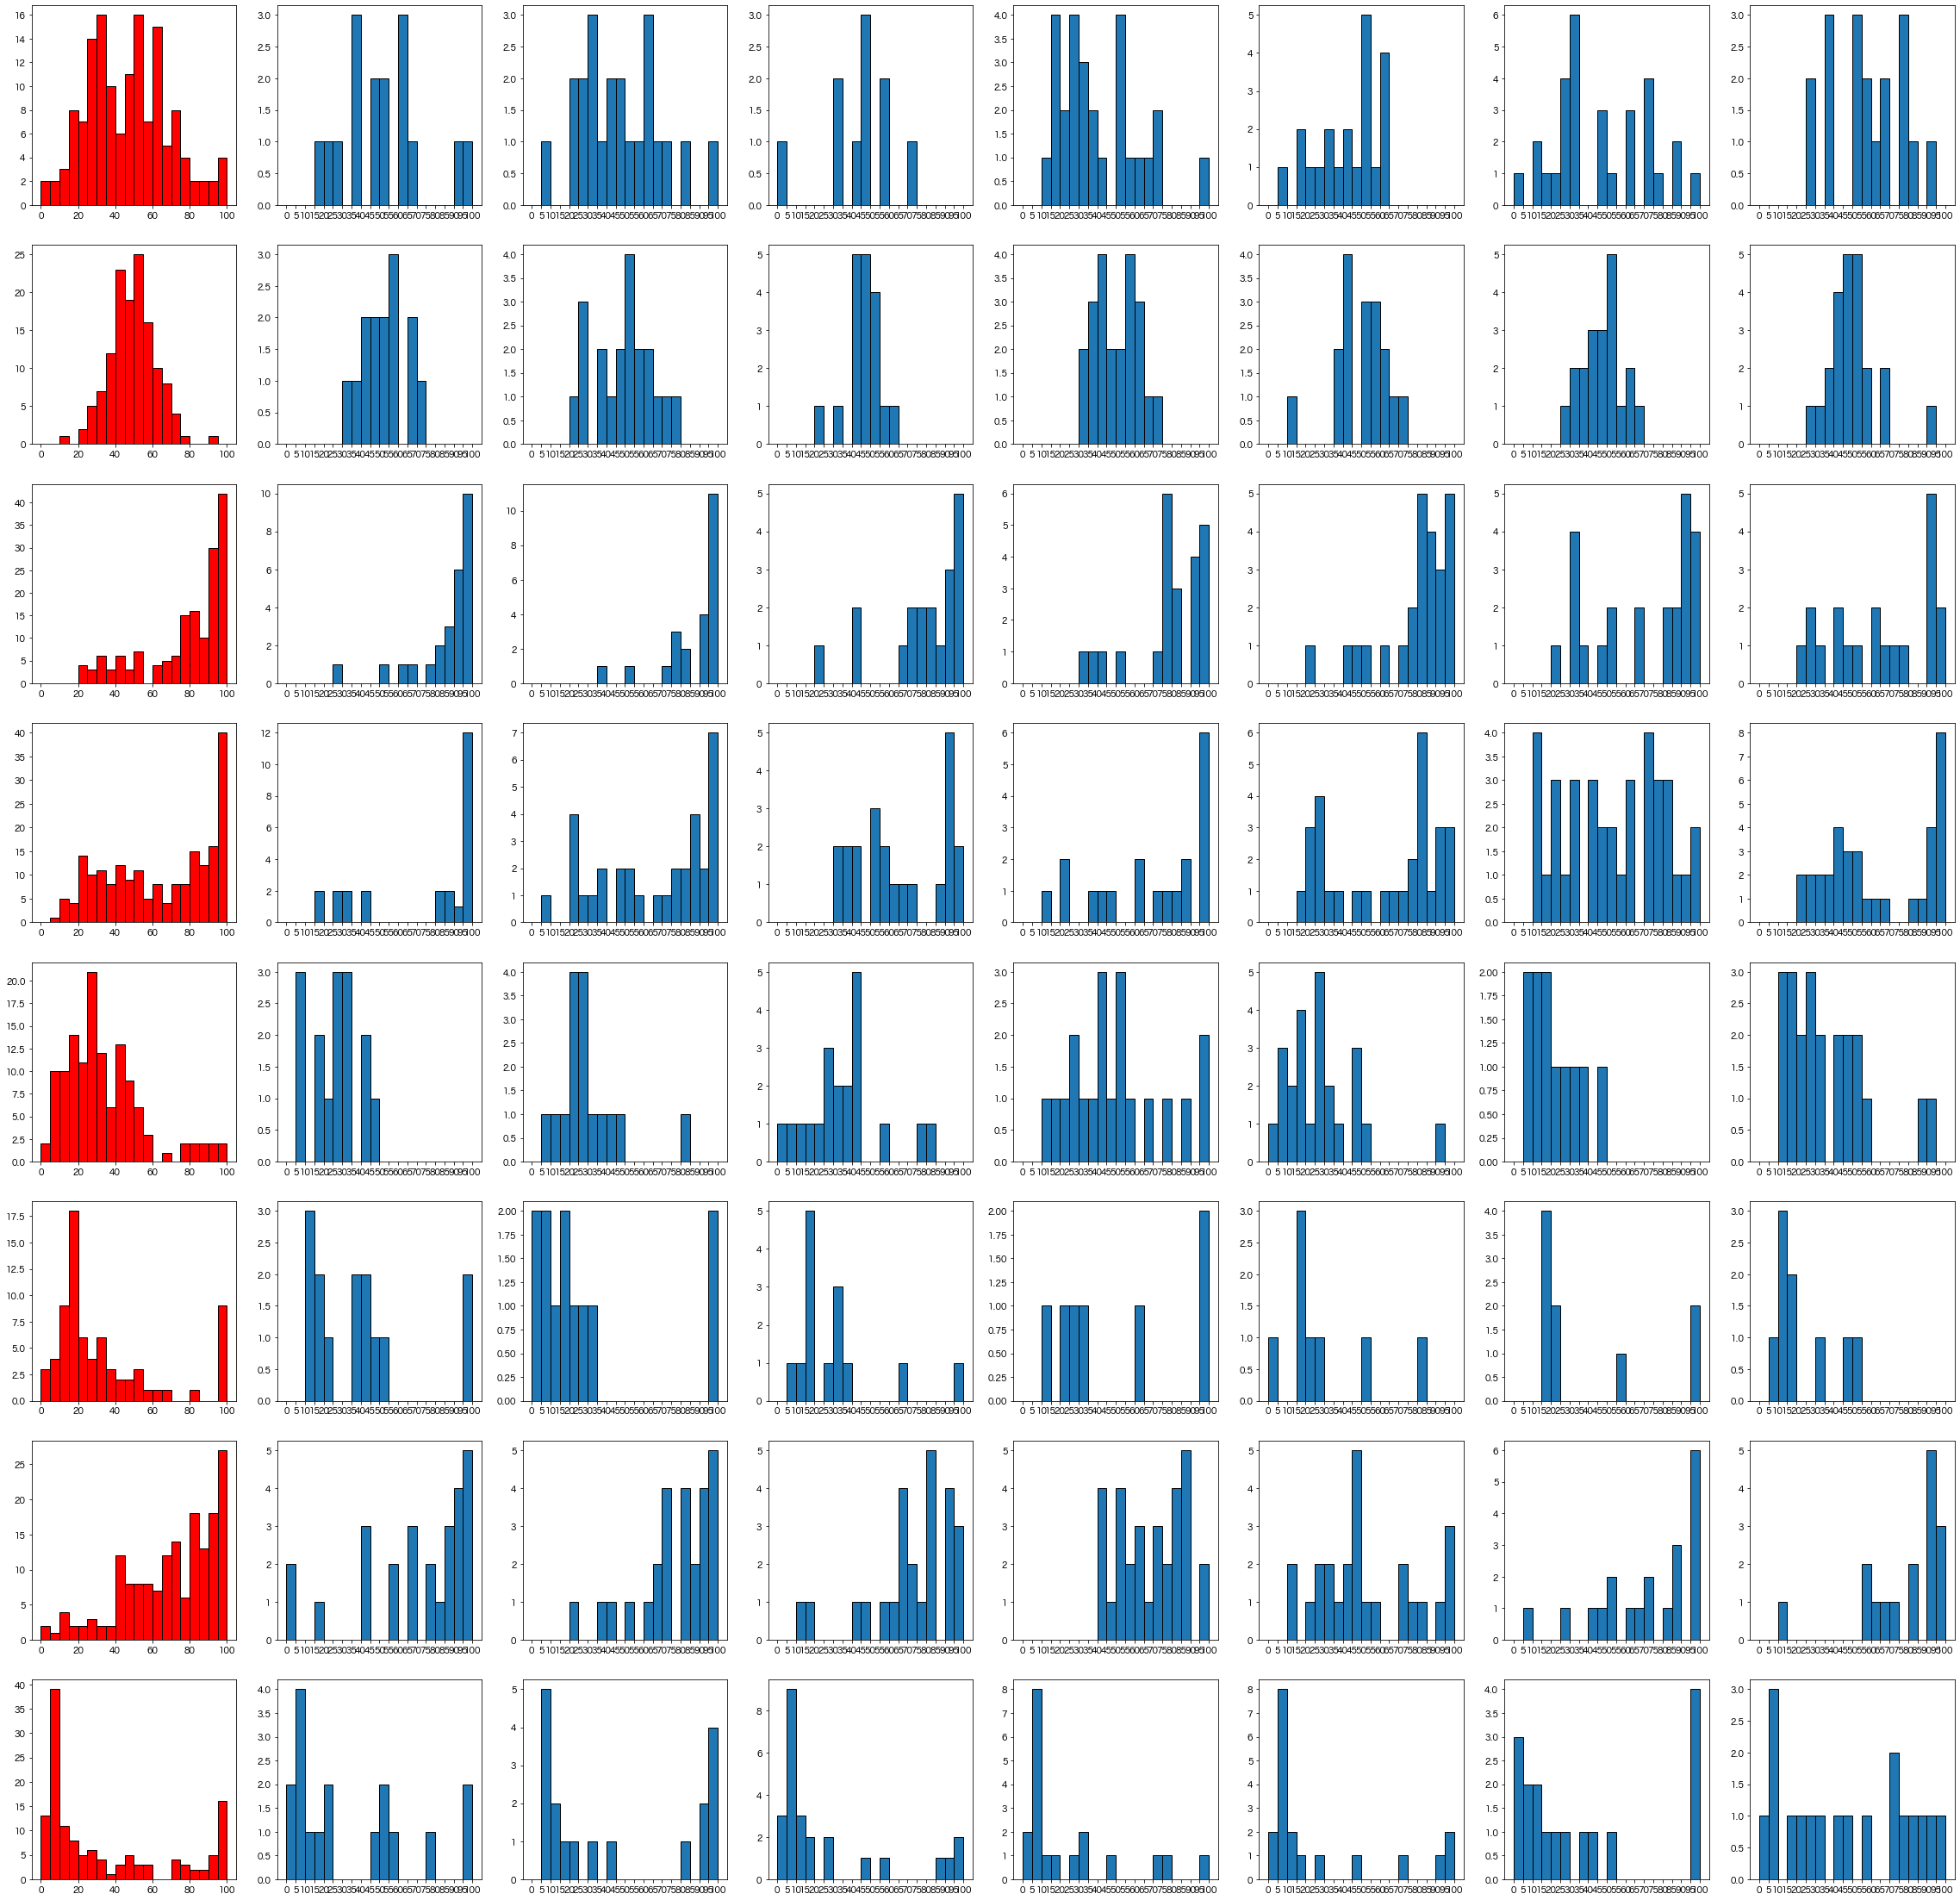

In [7]:
#hist plot - +weekday
plt.figure(figsize=(40,40))
fuse_users = [x for x in range(0,8)] 
x_range = np.arange(0,105,5)

for i in range(len(users)):
    plt.subplot(8,8,1+i*8)
    plt.hist(df.loc[(df["User"] == users[i]) & 
                    (df["state"] == "ON") & 
                    (df["date"] > dt.datetime(2021,12,1)) & 
                    (df["date"] < dt.datetime(2022,1,31))]["battery"],
             range=(0,100),
             bins=20,
             ec="black",
             color="red"
            )
    for j in range(0,7):
        plt.subplot(8,8,(j+2)+i*8)
        plt.xticks(x_range)
        plt.hist(df.loc[(df["User"] == users[i]) & 
                        (df["state"] == "ON") & 
                        (df["date"] > dt.datetime(2021,12,1)) & 
                        (df["date"] < dt.datetime(2022,1,31)) &
                        (df["weekday"] == j)]["battery"],
                 range=(0,100),
                 bins=20,
                 ec="black"
                )
# plt.savefig("bs_2_results/hist_plot_plus_weekday_battery.jpg")

In [150]:
# fig,ax = plt.subplots(3,3)
plt.figure(figsize=(20,20))
fuse_users = [x for x in range(0,8)]
for i in range(len(users)):
    user_data = df.loc[(df["User"] == users[i]) & 
                        (df["state"] == "ON") & 
                            (df["date"] > dt.datetime(2021,12,1)) & 
                                (df["date"] < dt.datetime(2022,1,31))]
    
#     plt.subplot(3,3,i+1)
#     plt.title(fuse_users[i])
#     plt.plot(user_data["time_to_num"],user_data["battery"],"o")

# plt.show()
# plt.savefig("bs_2_results/scatter.jpg")

<Figure size 1440x1440 with 0 Axes>

In [23]:
Nari_data_12 = df.loc[(df["User"] == "Narita") & 
                     (df["state"] == "ON") & 
                       (df["date"] > dt.datetime(2021,12,1)) & 
                         (df["date"] < dt.datetime(2021,12,31))]

In [25]:
Nari_data_1 = df.loc[(df["User"] == "Narita") & 
                     (df["state"] == "ON") & 
                       (df["date"] > dt.datetime(2022,1,1)) & 
                         (df["date"] < dt.datetime(2022,1,31))]

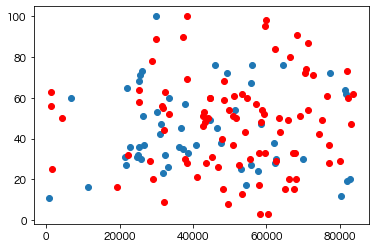

In [26]:
plt.plot(Nari_data_12["time_to_num"],Nari_data_12["battery"],"o")
plt.plot(Nari_data_1["time_to_num"],Nari_data_1["battery"],"o",color="r")
plt.show()

In [59]:
Nari_data_b_and_tnum = Nari_data.loc[:,["time_to_num","battery"]]

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
model_lr = LinearRegression()
std_scaler = StandardScaler()
std_scaler.fit(Nari_data_b_and_tnum)
df_std = pd.DataFrame(std_scaler.transform(Nari_data_b_and_tnum), columns=Nari_data_b_and_tnum.columns)
x = df_std[["time_to_num"]]
y = df_std[["battery"]]
model_lr.fit(x,y)

LinearRegression()

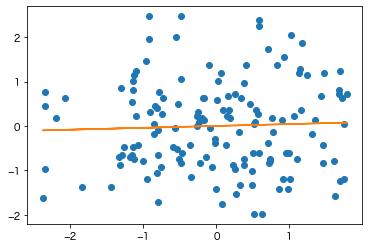

モデル関数の回帰変数 w1: 0.041976
モデル関数の切片 w2: -0.000
y= 0.041976x + -0.000
決定係数 R^2：  0.0017619929041250426


In [72]:
plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))